# Imports

In [11]:
from glob import glob
import os
import pandas as pd
from typing import List

import cv2

# Args

In [10]:
croped_age_img_folder = r"../data/"

# Read data

In [24]:
filenpaths = sorted(glob(f"{croped_age_img_folder}/*.jpg"))
print(len(filenpaths))

23709


In [26]:
filenpaths[0].split(os.sep)[-1]

'100_0_0_20170112213500903.jpg.chip.jpg'

# Extrace targets

In [50]:
def convert_names_and_images(paths: list) -> List[List[str]]:
    """{age}_{sm1}_{sm2}_{human_id} to header=[filename_full, side, person_id, age]
    DataFrame ready list of lists"""
    converted_data = []
    for path in paths:
        image = cv2.imread(path)
        height, width = image.shape[:2]
        side = max(height, width)

        # Extract information from the filename
        filename_full = path.split(os.sep)[-1]
        name = filename_full.split(".")[0]
        name_parts = name.split("_")

        person_id = name
        age = int(name_parts[0])

        row = (filename_full, side, person_id, age)
        converted_data.append(row)

    return converted_data

In [52]:
df = pd.DataFrame(
    convert_names_and_images(filenpaths),
    columns="filename_full, side, person_id, age".split(", "),
)

In [53]:
df.sample(5)

,filename_full,side,person_id,age
11182,30_1_3_20170117132700450.jpg.chip.jpg,200,30_1_3_20170117132700450,30
18758,53_1_0_20170104212453853.jpg.chip.jpg,200,53_1_0_20170104212453853,53
4516,24_1_0_20170117155121820.jpg.chip.jpg,200,24_1_0_20170117155121820,24
6050,26_0_1_20170113135547147.jpg.chip.jpg,200,26_0_1_20170113135547147,26
12316,33_1_0_20170103181128408.jpg.chip.jpg,200,33_1_0_20170103181128408,33


# Analyze the data

## Boundaries and outliers

In [54]:
df.describe()

,side,age
count,23709.0,23709.000000
mean,200.0,33.304652
std,0.0,19.886506
min,200.0,1.000000
25%,200.0,23.000000
50%,200.0,29.000000
75%,200.0,45.000000
max,200.0,116.000000


## Unique people

In [56]:
df["person_id"].nunique()

23709

All are different

## Target distribution

<AxesSubplot: ylabel='Density'>

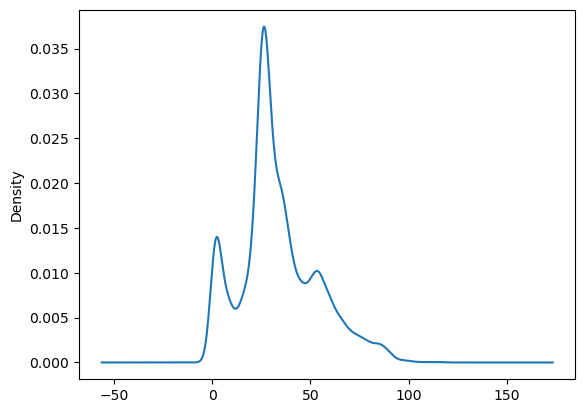

In [57]:
df["age"].plot(kind="kde")

Teens are strangly rare

The most represented is middle aged